### $\color{indianred}{\text{ШЕСТА ВЈЕЖБА ИЗ АСТРОСТАТИСТИКЕ}} $

### Кратак увод

<hr style="border: none; height: 2px; background-color: red; opacity: 0.5;" />

Из Бајесове формуле слиједи једнакост:

$$
p(x,y) = p(x|y)\,p(y) = p(y|x)\,p(x).
$$

Нешто слично се користи и за пресјек:

$$
p(A\cap B) \equiv p(A,B) = p(A|B)\,p(B) = p(B|A)\,p(A).
$$

Маргинална вјероватноћа дата је преко:

$$
p(x) = \int p(x,y)\,\rm{d}y,
$$

што се даље може записати као:

$$
p(x) = \int p(x|y)\,p(y)\,\rm{d}y.
$$

Помоћу досад дефинисаних записа, долазимо до:

$$
p(y|x) = \frac{p(x|y)\,p(y)}{p(x)}
= \frac{p(x|y)\,p(y)}{\int p(x|y)\,p(y)\,dy},
$$

што је формулација Бајесовог правила.

---

Основна премиса Бајесовске методе је да тврдње о вјероватноћи нису ограничене само на податке,

већ да могу бити постављане и за сам модел и параметре модела (који се третирају као случајне 

промјењиве). Одређују се постериорне расподјеле вјероватноће, на основу приорних информација.

Бајесово правило, још једном, можемо написати као:

$$
p(M|D)=\frac{p(D|M)p(M)}{p(D)},
$$

гдје $D$ представља податке, а $M$ модел. У обзир узимамо и приорне информације ($I$) и параметре модела ($\theta$):

$$
p(M,\theta|D,I)=\frac{p(D|M,\theta,I)p(M,\theta|I)}{p(D|I)}.
$$

Бајесовско закључивање се састоји од неколико корака:

1. формулисање $p(D|M,\theta,I)$;
2. одабир $p(M,\theta|I)$;
3. одређивање постериорне функције расподјеле $p(M,\theta|D,I)$;
4. базична статистика и неодређености у моделним параметрима;
5. одабир модела који је најбоље описује податке.

Ваља напоменути да је $p(D|I)$ важно за рангирање различитих модела које имамо.

---

Закључивање би требало да буде што више "вођено" подацима, тако да нам је од интереса да узимамо тзв. 

слабо-информишуће 
приорне расподјеле. Битно нам је се поштују принципи индиферентности, инваријантности

и максималне ентропије (о чему је било ријечи на предавањима).

Хијерархијско бајесовско моделовање представља проширење класичног бајесовског приступа, у којем не само да

моделирамо параметре од интереса, већ и саме приорне расподјеле тих параметара. То постижемо тако што уводимо 

тзв. хиперпараметре, који контролишу облик приорне расподјеле (сходно томе, имамо њихове хиперприорне расподјеле).

У стандардном бајесовском моделовању, приорне расподјеле су често фиксне: нпр. нормална расподјела са унапријед 

задатом средњом вриједношћу и дисперзијом. У хијерархијском моделу, те вриједности нису фиксне већ се третирају 

као непознате величине које процјењујемо из података. Биће јасније из неког примјера везаног за астрофизику.

У потрази за егзопланетама користе се криве сјаја. Бајесовским моделовањем можемо прилагодити те криве како бисмо

добили параметре као што су орбитални период, ексцентрицитет и сл. Али често немамо много информација о вјероватним 

вриједностима тих параметара унапријед - приорне расподјеле су слабо-информишуће. Хијерархијско моделовање даје нам 

моугћност да те приорне расподјеле извучемо из самих података. Ако имамо велики број система, можемо процијенити 

како се орбитални периоди или ексцентрицитети распоређују у популацији, те добијамо не само индивидуалне параметре,

већ и демографску слику планетарних система.

---

У фреквентистичкој парадигми, значење интервала повjерења $\mu_0 \pm \sigma_\mu$ је интервал који би садржао праву вриједност

$\mu$ (из које су подаци изведени) у $68\%$ (или $X\%$) случајева великог броја замишљених поновљених експеримената 

(сваки са различитим бројем N вриједности $\{x_i\}$). Међутим, значење бајесовског региона вјеродостојности је суштински

другачије: то је интервал који садржи праву вриједност $\mu$ са вјероватноћом од $68\%$ (или $X\%$), на основу датог скупа података

(у бајесовској парадигми нема замишљених експеримената). Региони вјеродостојности нису јединствени. Можемо их 

израчунати на два различита начина:

1. интеграција од MAP (*Maximum A Posteriori*) наниже док се не обухвати $X\%$ (интервал највеће густине вјероватноће);
2. интеграција од спољних дијелова ка средини по $X/2\%$ (интервал са једнаким реповима).

---

Коначно, прелазимо на кодирање. Имамо примјер са бацањем новчића. Вјероватноћа да  падне $h$ глава у $n$ бацања дата је 

биномном расподјелом вјероватноће $p(h|\theta)=\theta^h(1-\theta)^{(n-h)}$. Ми желимо бајесовску постериорну расподјелу за добијање 

главе након одређеног броја бацања, рецимо $[5,50,500]$.


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from astroML.plotting.mcmc import convert_to_stdev
# np.random.seed(42)

In [8]:
data = np.random.choice([0, 1], size=500, p=[0.3, 0.7])

In [9]:
len(data), np.sum(data==0), np.sum(data==1)

(500, np.int64(152), np.int64(348))

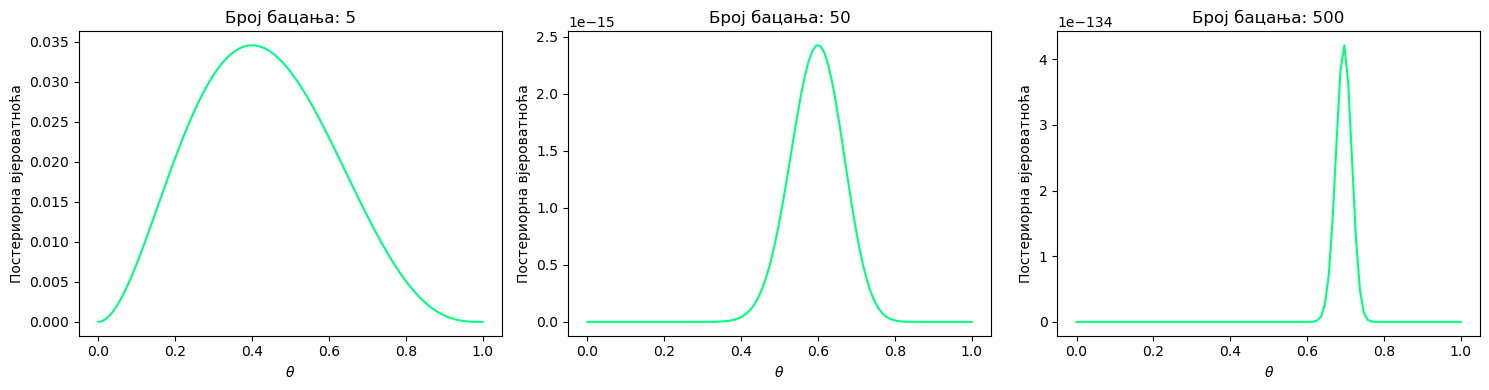

In [19]:
def p_nheads(n, h, theta):
    return (theta**h) * ((1 - theta)**(n - h))

def L(data, ntrials, theta): 
    nheads = data[:ntrials].sum()
    return p_nheads(ntrials, nheads, theta)

def prior(theta):  # униформна приорна расподјела
    return 1

theta = np.linspace(0, 1, 100)
n_trials = [5, 50, 500]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, nt in zip(axes, n_trials):
    posterior = L(data, nt, theta) * prior(theta)
    ax.plot(theta, posterior, color='springgreen')
    ax.set_title(f"Број бацања: {nt}")
    ax.set_xlabel(r"$\theta$")
    ax.set_ylabel("Постериорна вјероватноћа")
plt.tight_layout()
plt.show()

Можемо искористити $\beta$ функцију за приорну, те онда имамо:

$$
p(\alpha,\beta,\theta)=\theta^{\alpha-1}(1-\theta)^{(1-\beta)}.
$$

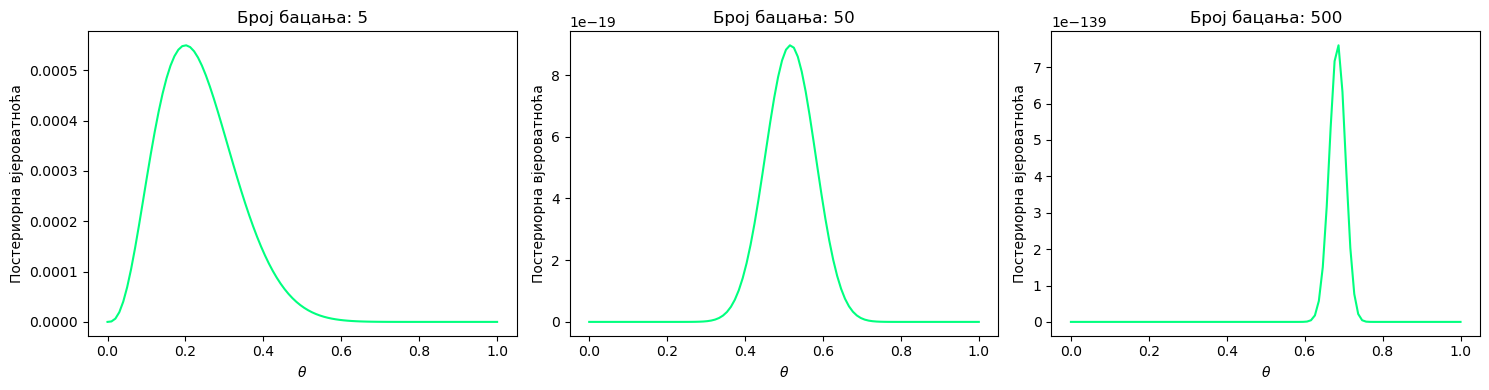

In [20]:
def prior(theta): # новчић ће бити пристраснан ка томе да падне писмо
    alpha=1 
    beta=10
    return  (theta**alpha) * ((1-theta)**(beta-1))

theta = np.linspace(0, 1, 100)
n_trials = [5, 50, 500]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, nt in zip(axes, n_trials):
    posterior = L(data, nt, theta) * prior(theta)
    ax.plot(theta, posterior, color='springgreen')
    ax.set_title(f"Број бацања: {nt}")
    ax.set_xlabel(r"$\theta$")
    ax.set_ylabel("Постериорна вјероватноћа")
plt.tight_layout()
plt.show()

Случајеви са $5$ бацања се највише разликују од међусобно. Како се повећава количина података, закључивање је све

више вођено подацима, па је приорна расподјела све мање важна.

---

Размотримо случај мјерења сјаја звијезде, у коме врло добро познајемо свој телескоп. Желимо да знамо постериорну 

расподјелу вјероватноће за сјај звијезде $p(M, \theta|D, I) \equiv p(\mu|\{x_i\}, \{\sigma_i\}, I)$, тј. $\sigma_i$ је по претпоставци познато.

Од раније нам је позната сљедећа једнакост:

$$
L = p(\{x_i\}|\mu, I) = \prod_{i=1}^{N} \frac{1}{\sigma_i \sqrt{2\pi}} e^{\frac{-(x_i - \mu)^2}{2\sigma_i^2}}.
$$

У бајесовском случају, потребана нам је приорна расподјела. Можемо узети униформну расподјелу, дату као:

$$
p(\mu \mid I) = C, \quad \text{за } \mu_{\text{min}} < \mu < \mu_{\text{max}},
$$

гдје је:

$$
C = \frac{1}{\mu_{\text{max}} - \mu_{\text{min}}},
$$

а изван тог интервала, расподјела је нула. Даље имамо:

$$
\ln L = \text{const.} - \sum_{i=1}^{N} \frac{(x_i - \mu)^2}{2\sigma_i^2}.
$$

Пошто константа нема утицаја на максимум, добијамо исти резултат као и раније:

$$
\mu^0 = \frac{\sum_{i}^{N} x_i / \sigma_i^2}{\sum_{i}^{N} 1 / \sigma_i^2},\,\,\,\sigma_\mu=\Big(\sum_{i}^{N}1/\sigma_i^2\Big)^{-1/2}.
$$

Међутим, постоји случај када $\sigma$ није познато, и мора бити одређено из података. Мјере се карактеристике

звијезде и самог неба. Сада, постериорна расподјела коју тражимо није $p(\mu|\{x_i\}, \{\sigma_i\}, I)$, већ заједничка 

дводимензионална расподјела $p(\mu, \sigma \mid \{x_i\}, I)$. Слично као и раније, важи:

$$
L = p(\{x_i\}|\mu, \sigma, I) = \prod_{i=1}^{N} \frac{1}{\sigma \sqrt{2\pi}} e^{\frac{-(x_i - \mu)^2}{2\sigma^2}}.
$$

Бајесовска приорна функција је дводимензионална, и узимамо:

$$
p(\mu, \sigma | I) \propto \frac{1}{\sigma}, \quad \text{за  } \mu_{\text{min}} < \mu < \mu_{\text{max}} \text{  и  } \sigma_{\text{min}} < \sigma < \sigma_{\text{max}}.
$$

Уз правилну нормализацију, слиједи:

$$
p(\{x_i\} | \mu, \sigma, I) p(\mu, \sigma \mid I)
= C \cdot \frac{1}{\sigma^{N+1}} \prod_{i=1}^{N} e^{\frac{-(x_i - \mu)^2}{2\sigma^2}},
$$

гдје је:

$$
C = (2\pi)^{-N/2} (\mu_{\text{max}} - \mu_{\text{min}})^{-1} 
\left[ \ln\left( \frac{\sigma_{\text{max}}}{\sigma_{\text{min}}} \right) \right]^{-1}.
$$

Даље, пишемо:

$$
\ln[p(\mu, \sigma | \{x_i\}, I)] = \text{const.} - (N + 1)\ln\sigma - \sum_{i=1}^{N} \frac{(x_i - \mu)^2}{2\sigma^2}.
$$

Претпостављена је нормална расподјела, па средња вриједност $\bar{x}$ и варијанса $V (= s^2)$ дају потпун опис.

$$
\ln[p(\mu, \sigma | \{x_i\}, I)] = \text{const.} - (N + 1)\ln\sigma - \frac{N}{2\sigma^2}((\bar{x} - \mu)^2 + V).
$$

Израз садржи само $2$ параметра које покушавамо да одредимо $(\mu, \sigma)$ и $3$ вриједности које можемо директно

одредити из података $(N, \bar{x}, V)$.

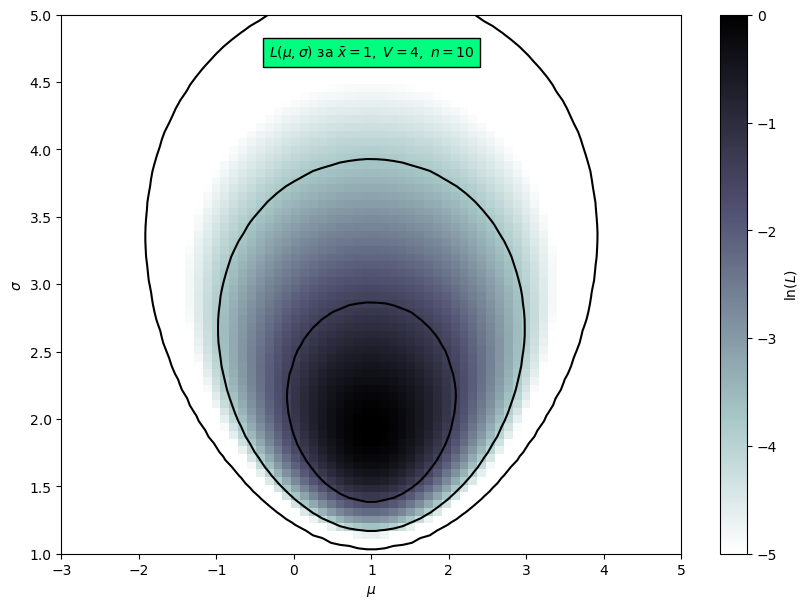

In [25]:
def gauss_logL(xbar, V, n, sigma, mu):
    return (-(n + 1) * np.log(sigma) - 0.5 * n * ((xbar - mu) ** 2 + V) / sigma ** 2)

sigma = np.linspace(1, 5, 70)
mu = np.linspace(-3, 5, 70)
xbar = 1
V = 4
n = 10

logL = gauss_logL(xbar, V, n, sigma[:, np.newaxis], mu)
logL -= logL.max()

fig = plt.figure(figsize=(10, 7))
plt.imshow(logL, origin='lower', extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
           cmap='bone_r', aspect='auto')
plt.colorbar().set_label(r'$\ln(L)$')
plt.clim(-5, 0)
plt.contour(mu, sigma, convert_to_stdev(logL), levels=(0.683, 0.955, 0.997), colors='black')

plt.text(0.5, 0.93, r'$L(\mu,\sigma)\ \mathrm{за}\ \bar{x}=1,\ V=4,\ n=10$',
         bbox=dict(edgecolor='black', facecolor='springgreen'),
         ha='center', va='center', transform=plt.gca().transAxes)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')
plt.show()

Ако нпр. желимо $p(\mu | \{x_i\}, I)$, а не $p(\mu, \sigma | \{x_i\}, I)$, вршимо маргинализацију по $\sigma$:

$$
p(\mu | \{x_i\}, I) = \int_{0}^{\infty} p(\mu, \sigma | \{x_i\}, I)d\sigma
$$

и тако (користећи смјену $t = 1/\sigma$ и парцијалну интеграцију) добијамо:

$$
p(\mu | \{x_i\}, I) \propto \left(1 + \frac{(\bar{x} - \mu)^2}{V}\right)^{-N/2}.
$$

Овај резултат одговара Студентовој $t$-расподјели са $k = N - 1$ степена слободе за промјенљиву $t = (\bar{x} - \mu) / (s / \sqrt{N})$,

гдје је $s$ стандардна девијација узорка. Студентова $t$-расподјела је симетрична и звонастог облика, али са "тежим" 

реповима него нормална расподјела. Свакако, она прелази у нормалну за велико $N$.

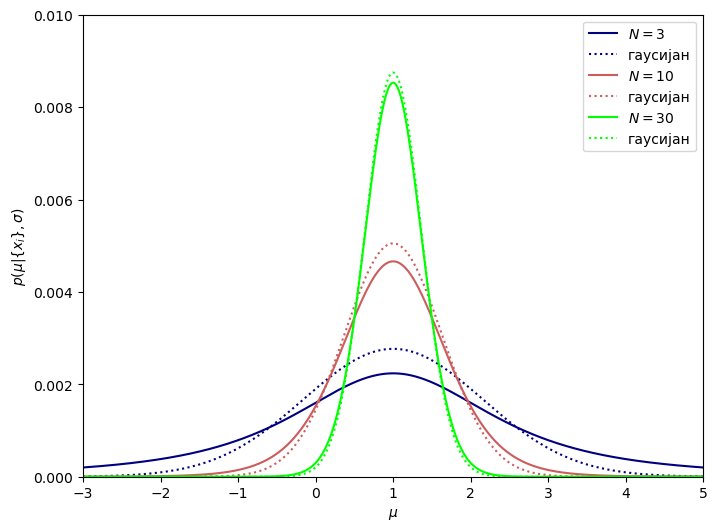

In [27]:
mu = np.linspace(-3, 5, 1000)
xbar = 1.0
V = 4.0

def compute_pmu(mu, xbar, V, N):
    p = (1 + (xbar - mu) ** 2 / V) ** (-0.5 * N)
    return p / np.sum(p)
    
N1 = 3
pmu1 = compute_pmu(mu,xbar,V,N1)
G1 = norm(xbar, np.sqrt(V/N1)).pdf(mu) 
G1norm = G1 / np.sum(G1)

N2 = 10
pmu2 = compute_pmu(mu,xbar,V,N2)
G2 = norm(xbar, np.sqrt(V/N2)).pdf(mu) 
G2norm = G2 / np.sum(G2)

N3 = 30
pmu3 = compute_pmu(mu,xbar,V,N3)
G3 = norm(xbar, np.sqrt(V/N3)).pdf(mu) 
G3norm = G3 / np.sum(G3)

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(mu, pmu1, linestyle='-', color='navy', label=r'$N=3$')
plt.plot(mu, G1norm, linestyle=':', color='navy', label=r'гаусијан')
plt.plot(mu, pmu2, linestyle='-', color='indianred', label=r'$N=10$')
plt.plot(mu, G2norm, linestyle=':', color='indianred', label=r'гаусијан')
plt.plot(mu, pmu3, linestyle='-', color='lime', label=r'$N=30$')
plt.plot(mu, G3norm, linestyle=':', color='lime', label=r'гаусијан')

plt.xlim(-3, 5)
plt.ylim(0, 0.01)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(\mu | \{x_i\},\sigma)$')
plt.legend()
plt.show() 